In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize and reshape the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
# Define the autoencoder model
input_img = keras.Input(shape=(28, 28, 1))
encoded = layers.Flatten()(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
decoded = layers.Reshape((28, 28, 1))(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


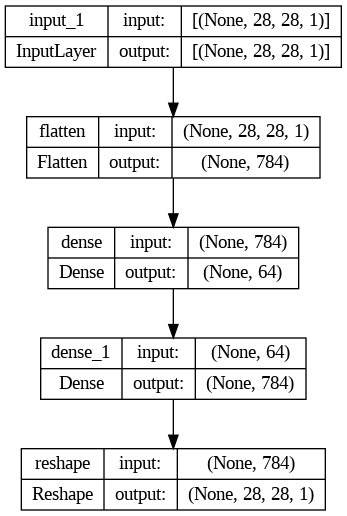

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(autoencoder, to_file='model_visualization.png', show_shapes=True)

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.1966 - val_loss: 0.1318
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1157 - val_loss: 0.1015
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0954 - val_loss: 0.0884
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0857 - val_loss: 0.0816
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0805 - val_loss: 0.0782
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0778 - val_loss: 0.0762
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0763 - val_loss: 0.0751
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0754 - val_loss: 0.0744
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0748 - val_loss: 0.0740
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0744 - val_loss:

In [ ]:
# Test the autoencoder
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Display some results
import matplotlib.pyplot as plt

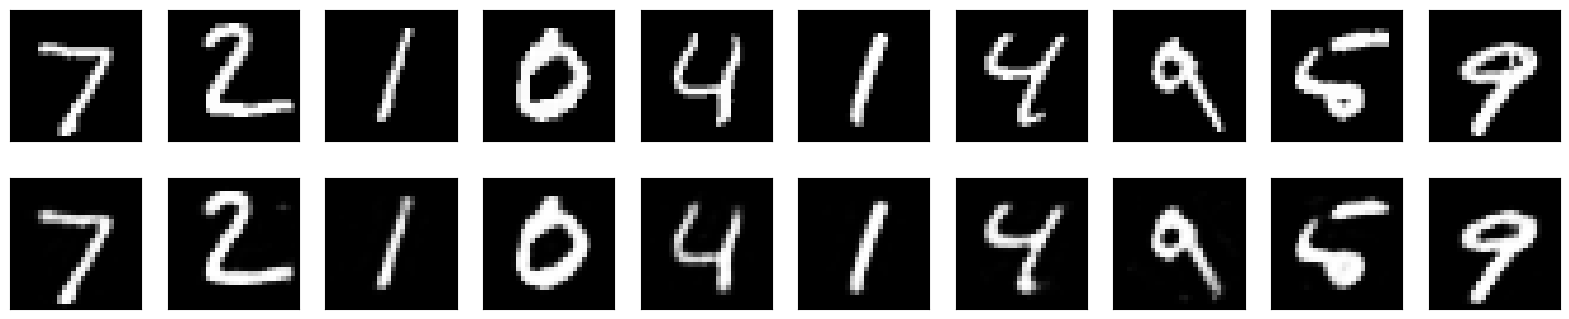

In [ ]:
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Decoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Exercise**: Autoencoder

In this exercise, you will implement an autoencoder using Keras to perform image reconstruction. You will use the fashion_mnist dataset, which consists of grayscale images of fashion materials.

Task:

1. Load the dataset and preprocess the images by scaling the pixel values between 0 and 1.

2. Build an autoencoder model using Keras with the following architecture:
* Encoder: Dense layer with 64/128/256 units and ReLU/LeakyReLU/eLU activation.
* Bottleneck layer: Dense layer with 32/64/128 units and ReLU/LeakyReLU/eLU activation.
* Decoder: Dense layer with 64/128/256 units and ReLU/LeakyReLU/eLU activation.
* Output layer: Dense layer with sigmoid/tanh activation.

3. Compile the model with an appropriate loss function and optimizer.
Train the autoencoder using the noisy images as input and the original clean images as target.

4. Evaluate the trained model on the test set by measuring the reconstruction loss.

5. Visualize the reconstruction performance by comparing the original images and the reconstructed images.

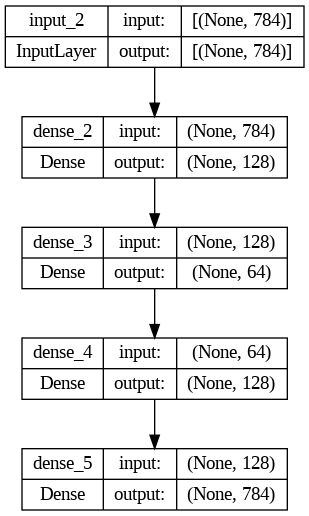

In [ ]:
plot_model(autoencoder, to_file='model_visualization.png', show_shapes=True)

In [ ]:
# Load the Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
input_size = np.prod(x_train.shape[1:])
x_train = x_train.reshape((len(x_train), input_size))
x_test = x_test.reshape((len(x_test), input_size))

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

4422102/4422102 [==============================] - 0s 0us/step


Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3211 - val_loss: 0.3034
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2968 - val_loss: 0.2966
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2919 - val_loss: 0.2939
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2894 - val_loss: 0.2928
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2876 - val_loss: 0.2912
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2863 - val_loss: 0.2908
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2854 - val_loss: 0.2905
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2846 - val_loss: 0.2902
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2839 - val_loss: 0.2900
Epoch 10/10
313/313 [==============================] - 1s 3ms/st

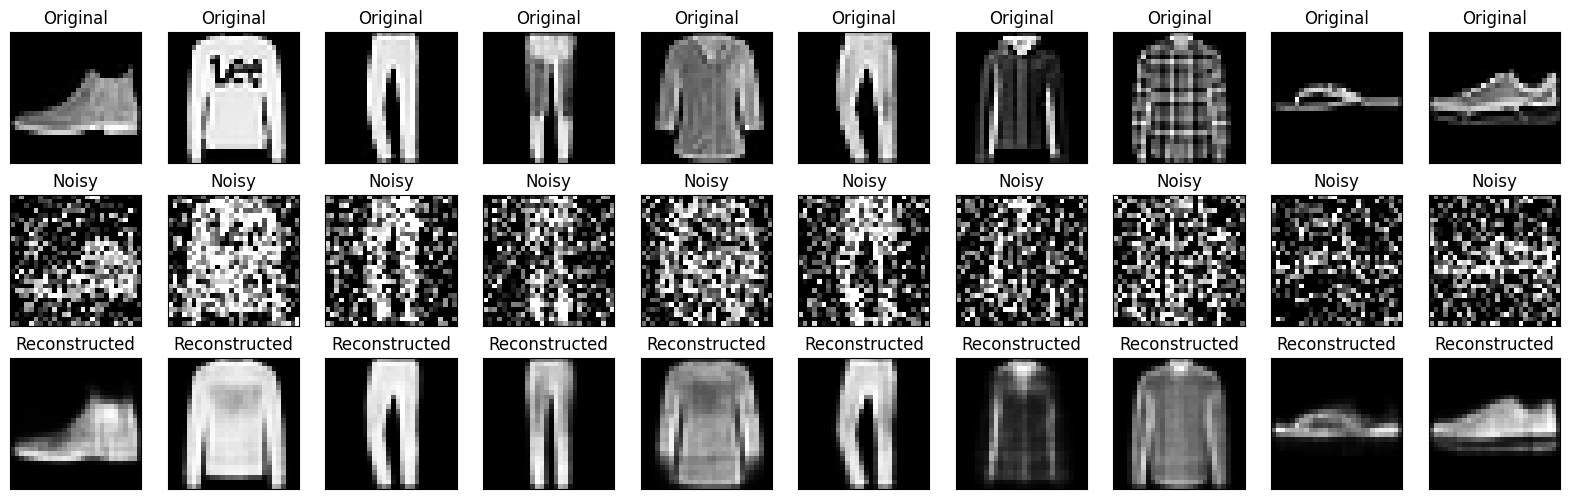

In [ ]:
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

def build_autoencoder(encoder_units, encoder_activation, bottleneck_units, bottleneck_activation, decoder_units, decoder_activation, output_activation):
    # Input layer
    input_layer = Input(shape=(input_size,))

    # Encoder
    encoder = Dense(encoder_units)(input_layer)
    encoder = LeakyReLU(alpha=0.2)(encoder)

    # Bottleneck layer
    bottleneck = Dense(bottleneck_units)(encoder)
    bottleneck = LeakyReLU(alpha=0.2)(bottleneck)

    # Decoder
    decoder = Dense(decoder_units)(bottleneck)
    decoder = LeakyReLU(alpha=0.2)(decoder)

    # Output layer
    output_layer = Dense(output_size, activation=output_activation)(decoder)

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=output_layer)

    # Encoder model (for extracting the encoded representation)
    encoder_model = Model(inputs=input_layer, outputs=bottleneck)

    return autoencoder, encoder_model

# Define the specifications
encoder_units = 256
encoder_activation = LeakyReLU(alpha=0.2)
bottleneck_units = 128
bottleneck_activation = LeakyReLU(alpha=0.2)
decoder_units = 256
decoder_activation = LeakyReLU(alpha=0.2)
output_activation = 'sigmoid'

# Specify the input and output sizes
output_size = input_size

# Build the autoencoder
autoencoder, encoder_model = build_autoencoder(encoder_units, encoder_activation,
                                               bottleneck_units, bottleneck_activation,
                                               decoder_units, decoder_activation,
                                               output_activation)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Reconstruct the images using the autoencoder
reconstructed_images = autoencoder.predict(x_test_noisy)

# Plotting the original, noisy, and reconstructed images
import matplotlib.pyplot as plt

n = 10  # number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title('Noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.title('Reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


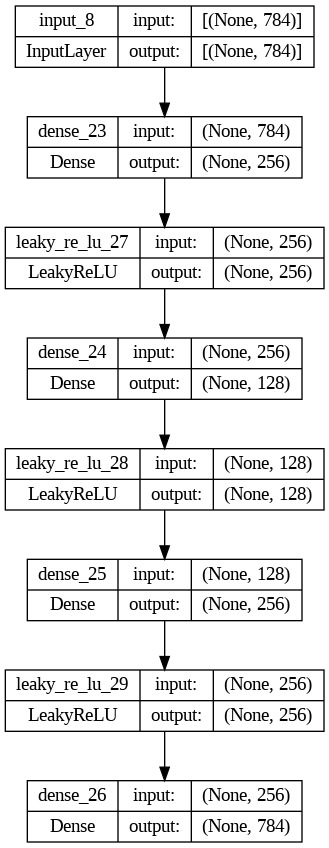

In [ ]:
plot_model(autoencoder, to_file='model_visualization.png', show_shapes=True)

Epoch 1/10
1563/1563 [==============================] - 101s 64ms/step - loss: 0.5971 - val_loss: 0.5887
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.5864 - val_loss: 0.5863
Epoch 3/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.5841 - val_loss: 0.5855
Epoch 4/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.5830 - val_loss: 0.5850
Epoch 5/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.5822 - val_loss: 0.5849
Epoch 6/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.5816 - val_loss: 0.5837
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.5811 - val_loss: 0.5837
Epoch 8/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.5807 - val_loss: 0.5843
Epoch 9/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.5804 - val_loss: 0.5839
Epoch 10/10
313/313 [==============================] - 3s 9ms/s

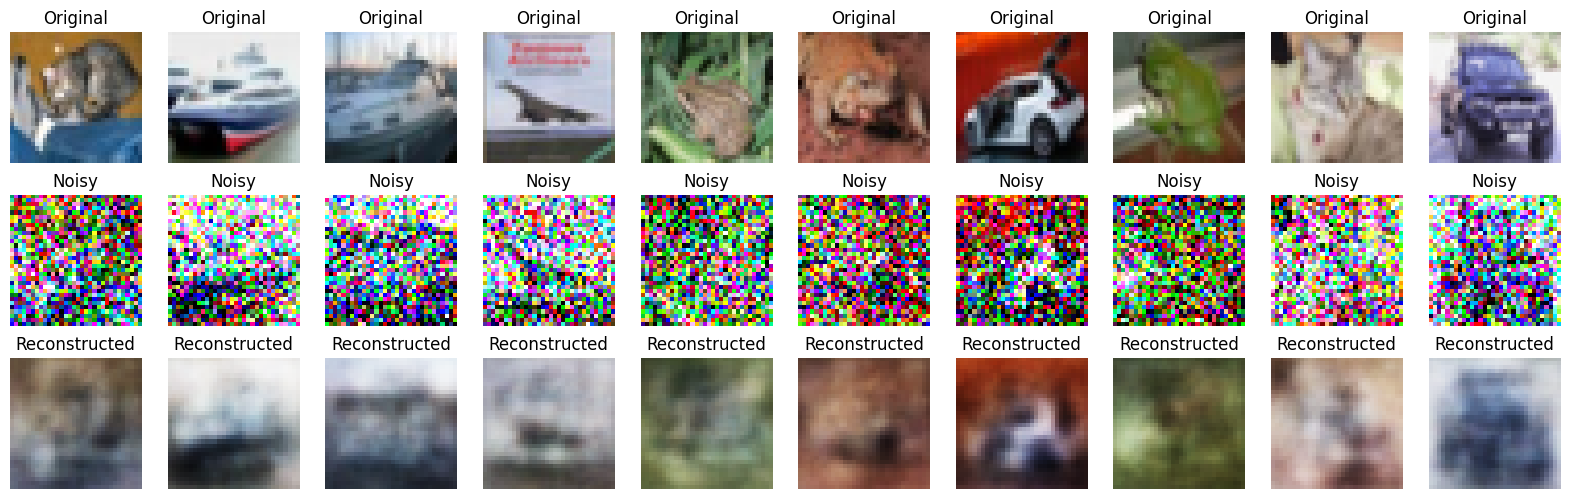

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Input, ELU
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

def build_autoencoder(encoder_units, encoder_activation, bottleneck_units, bottleneck_activation, decoder_units, decoder_activation, output_activation):
    # Input layer
    input_layer = Input(shape=(input_size,))

    # Encoder
    encoder = Dense(encoder_units, activation=encoder_activation)(input_layer)

    # Bottleneck layer
    bottleneck = Dense(bottleneck_units, activation=bottleneck_activation)(encoder)

    # Decoder
    decoder = Dense(decoder_units, activation=decoder_activation)(bottleneck)

    # Output layer
    output_layer = Dense(output_size, activation=output_activation)(decoder)

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=output_layer)

    # Encoder model (for extracting the encoded representation)
    encoder_model = Model(inputs=input_layer, outputs=bottleneck)

    return autoencoder, encoder_model

# Load the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
input_size = np.prod(x_train.shape[1:])
x_train = x_train.reshape((len(x_train), input_size))
x_test = x_test.reshape((len(x_test), input_size))

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the specifications
encoder_units = 512
encoder_activation = ELU(alpha=1.0)
bottleneck_units = 256
bottleneck_activation = ELU(alpha=1.0)
decoder_units = 512
decoder_activation = ELU(alpha=1.0)
output_activation = 'sigmoid'

# Specify the input and output sizes
output_size = input_size

# Build the autoencoder
autoencoder, encoder_model = build_autoencoder(encoder_units, encoder_activation,
                                               bottleneck_units, bottleneck_activation,
                                               decoder_units, decoder_activation,
                                               output_activation)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder using noisy images as input and clean images as targets
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Reconstruct the images using the autoencoder
reconstructed_images = autoencoder.predict(x_test_noisy)

# Plotting the original, noisy, and reconstructed images
import matplotlib.pyplot as plt

n = 10  # number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.title('Original')
    plt.axis('off')

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
    plt.title('Noisy')
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_images[i].reshape(32, 32, 3))
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()



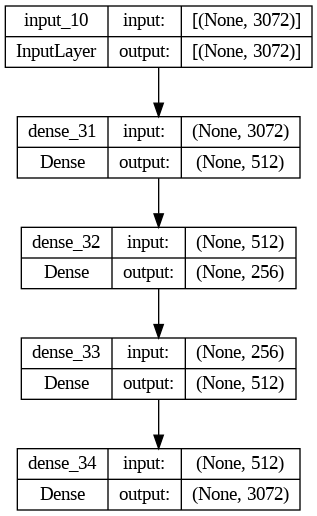

In [ ]:
plot_model(autoencoder, to_file='model_visualization.png', show_shapes=True)

# CNN

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3646 - loss: 1.7356 - val_accuracy: 0.5443 - val_loss: 1.2522
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5805 - loss: 1.1808 - val_accuracy: 0.6260 - val_loss: 1.0748
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6453 - loss: 1.0255 - val_accuracy: 0.6547 - val_loss: 0.9917
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6788 - loss: 0.9259 - val_accuracy: 0.6725 - val_loss: 0.9385
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6937 - loss: 0.8751 - val_accuracy: 0.6766 - val_loss: 0.9361
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7188 - loss: 0.8151 - val_accuracy: 0.6791 - val_loss: 0.9316
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7288 - loss: 0.7824 - val_accuracy: 0.6874 - val_loss: 0.9240
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7385 -

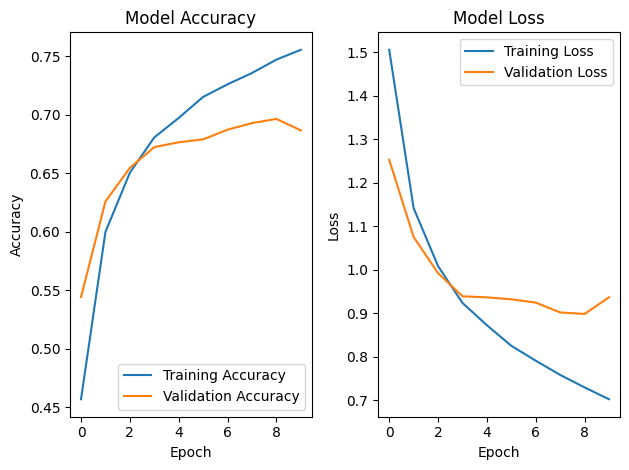

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 89ms/step - accuracy: 0.2524 - loss: 2.1670 - val_accuracy: 0.3868 - val_loss: 1.6777 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.4412 - loss: 1.5422 - val_accuracy: 0.4776 - val_loss: 1.4462 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.5172 - loss: 1.3424 - val_accuracy: 0.5616 - val_loss: 1.2418 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.5844 - loss: 1.1770 - val_accuracy: 0.5817 - val_loss: 1.2030 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6214 - loss: 1.0711 - val_accuracy: 0.6155 - val_loss: 1.1127 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.6727 - loss: 0.9417 - val_accuracy: 0.5879 - val_loss: 1.2121 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.7026 - l

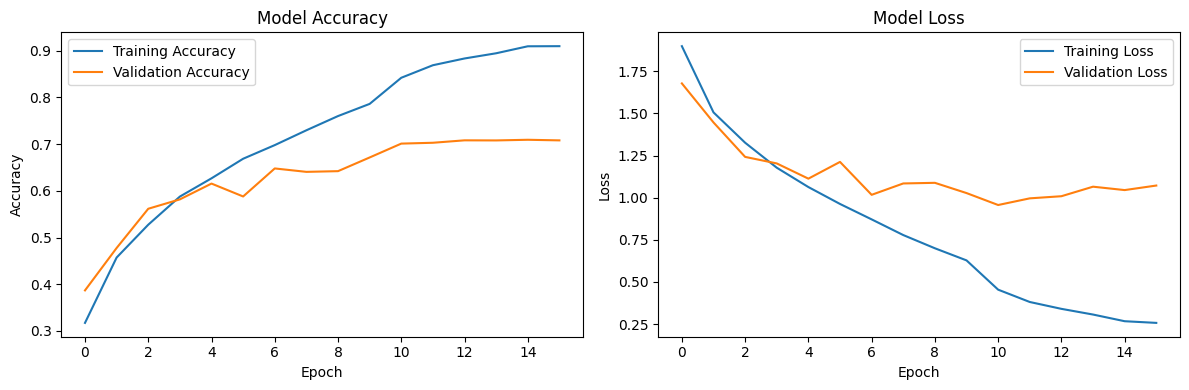

In [4]:
import tensorflow as tf 
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalization 

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Unoptimized

cnn_unoptimized = models.Sequential(
    [
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)


cnn_unoptimized.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = cnn_unoptimized.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()




# Optimized 


import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Build the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    # Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Add data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Train the model with data augmentation
history = model.fit(
    data_augmentation(X_train),
    y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)
    ]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# RNN 

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.6011 - loss: 0.6417 - val_accuracy: 0.7073 - val_loss: 0.5651
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8080 - loss: 0.4405 - val_accuracy: 0.8034 - val_loss: 0.4448
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8559 - loss: 0.3540 - val_accuracy: 0.7979 - val_loss: 0.4527
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8462 - loss: 0.3567 - val_accuracy: 0.8088 - val_loss: 0.4889
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9005 - loss: 0.2550 - val_accuracy: 0.7997 - val_loss: 0.4675
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.6946 - loss: 0.5484 - val_accuracy: 0.8635 - val_loss: 0.3220
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9058 - loss: 0.2477 - val_accuracy: 0.8635 - val_loss: 0.3304
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9351 - loss: 0.1784 - val_accu

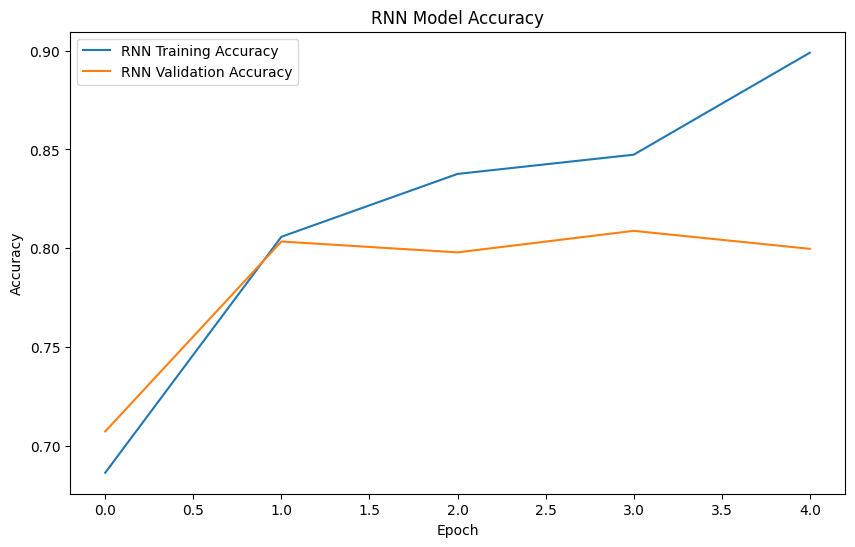

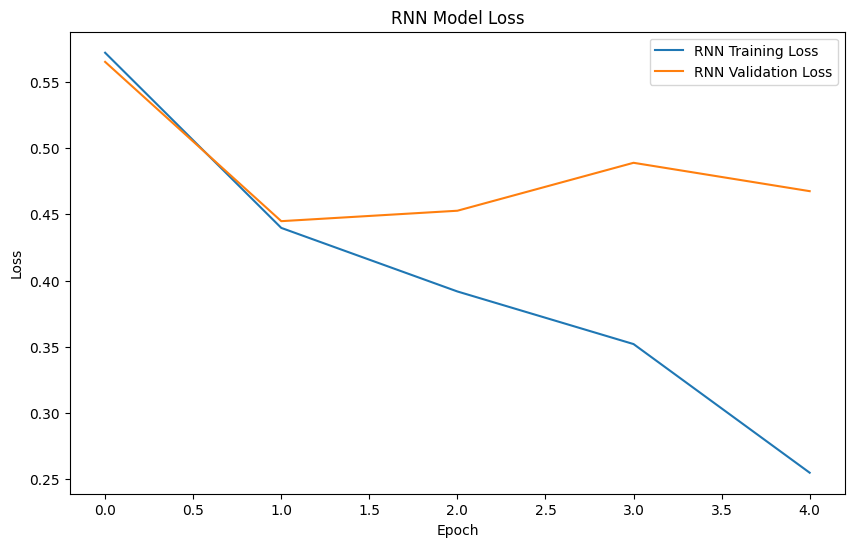

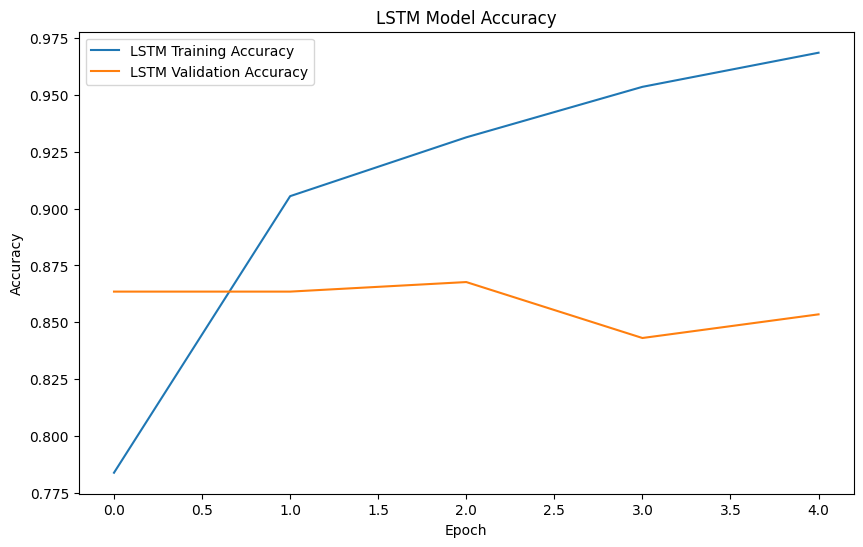

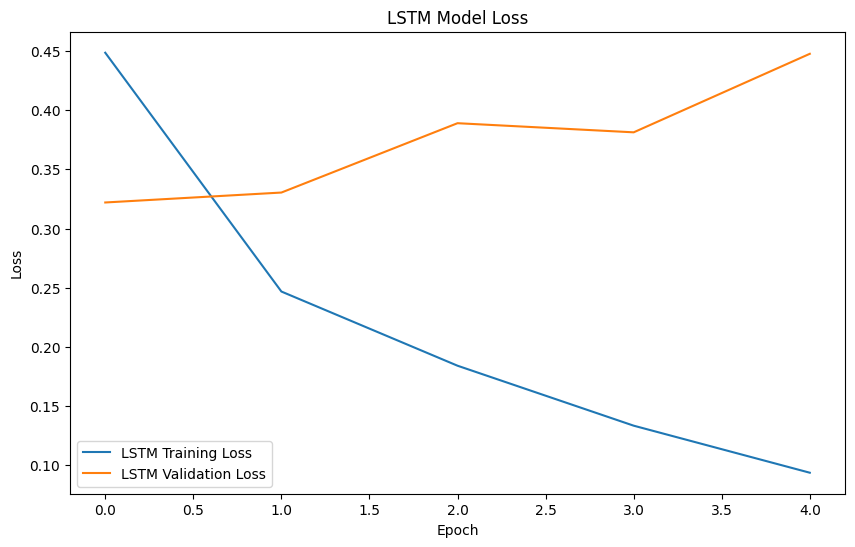

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
num_words = 10000
maxlen = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

val_samples = 10000
X_val = X_train[:val_samples]
y_val = y_train[:val_samples]
X_train = X_train[val_samples:]
y_train = y_train[val_samples:]

# Build and compile RNN model
max_words = 10000
embedding_dim = 50
rnn_units = 64
rnn_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    SimpleRNN(rnn_units),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Build and compile LSTM model
lstm_units = 64
lstm_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    LSTM(lstm_units),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train RNN model
epochs = 5
batch_size = 32
history_rnn = rnn_model.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=epochs,
                            batch_size=batch_size,
                            verbose=1)

# Train LSTM model
history_lstm = lstm_model.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=1)

# Evaluate models on test data
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test, y_test)
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test)

print(f"RNN Test Accuracy: {rnn_test_accuracy:.4f}")
print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f}")

# Plot RNN Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot RNN Loss
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot LSTM Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot LSTM Loss
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
